In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('log_part4.txt')

print(data.head())

   test  convoCount  channelSize  dropoutRate  epochs  avgLoss  accuracy
0     1           1           10          0.5       1   0.5389        81
1     1           1           10          0.5       2   0.4894        82
2     1           1           10          0.5       3   0.4425        84
3     1           1           10          0.5       4   0.4125        86
4     1           1           10          0.5       5   0.4095        85


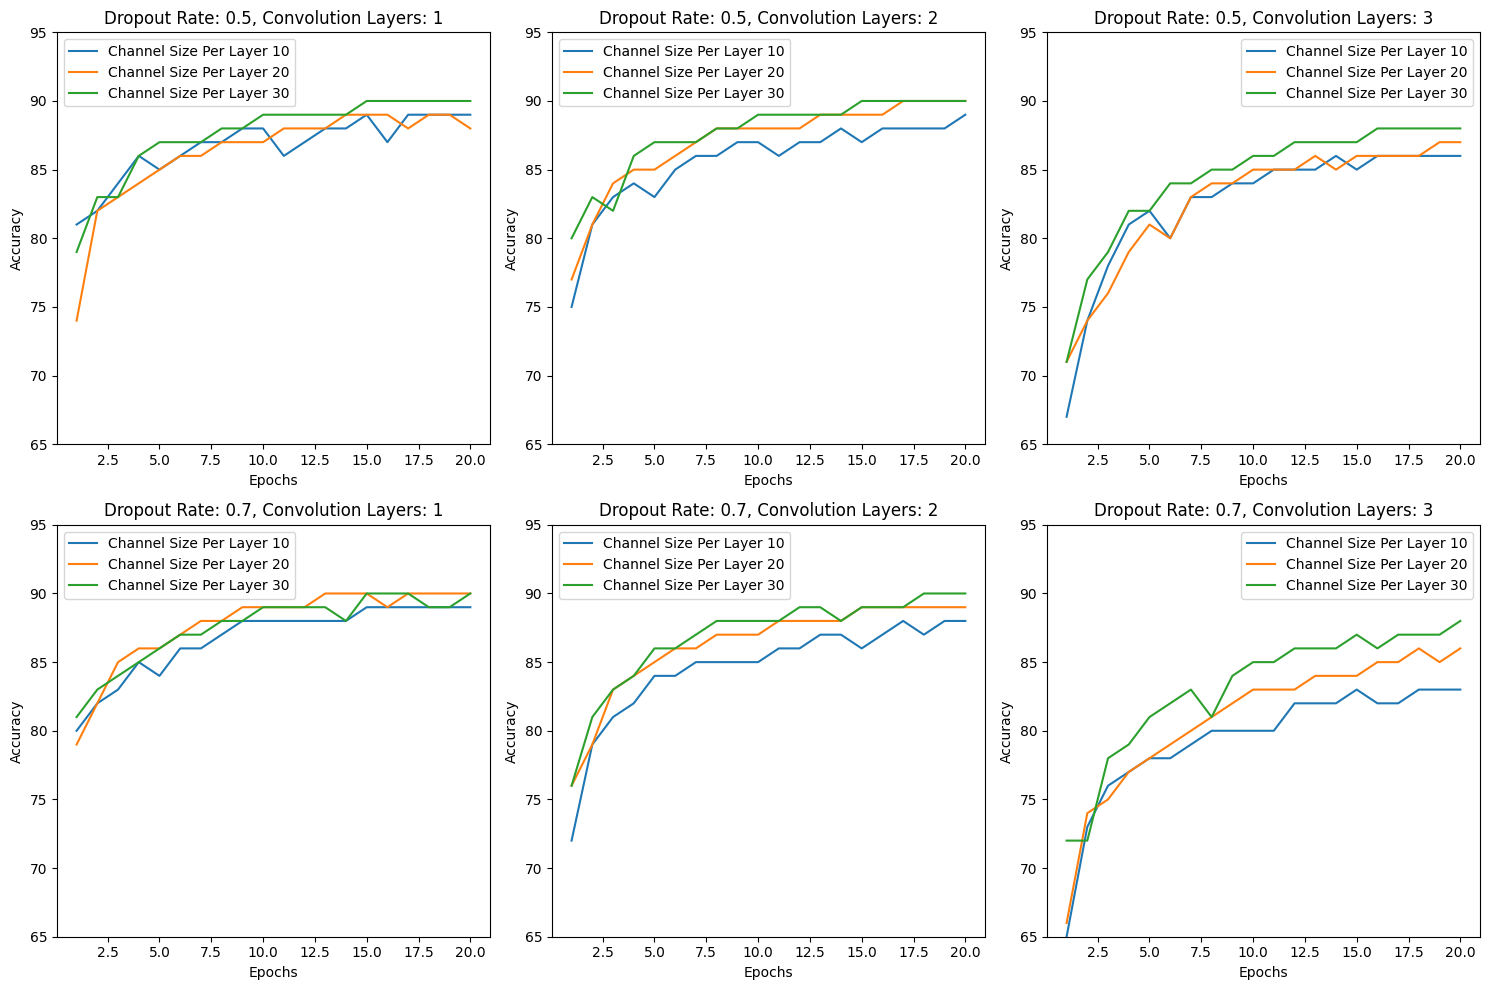

In [12]:
# Filtering data for each dropoutRate and convoCount combination
dropout_rates = data['dropoutRate'].unique()
convo_counts = data['convoCount'].unique()

fig, axs = plt.subplots(len(dropout_rates), len(convo_counts), figsize=(15, 10))

for i, dropout_rate in enumerate(dropout_rates):
    for j, convo_count in enumerate(convo_counts):
        filtered_data = data[(data['dropoutRate'] == dropout_rate) & (data['convoCount'] == convo_count)]
        
        for channel_size, channel_data in filtered_data.groupby('channelSize'):
            axs[i, j].plot(channel_data['epochs'], channel_data['accuracy'], label=f'Channel Size Per Layer {channel_size}')
        
        axs[i, j].set_title(f'Dropout Rate: {dropout_rate}, Convolution Layers: {convo_count}')
        axs[i, j].set_xlabel('Epochs')
        axs[i, j].set_ylabel('Accuracy')
        axs[i, j].set_ylim(65, 95)
        axs[i, j].legend()

plt.tight_layout()
plt.show()

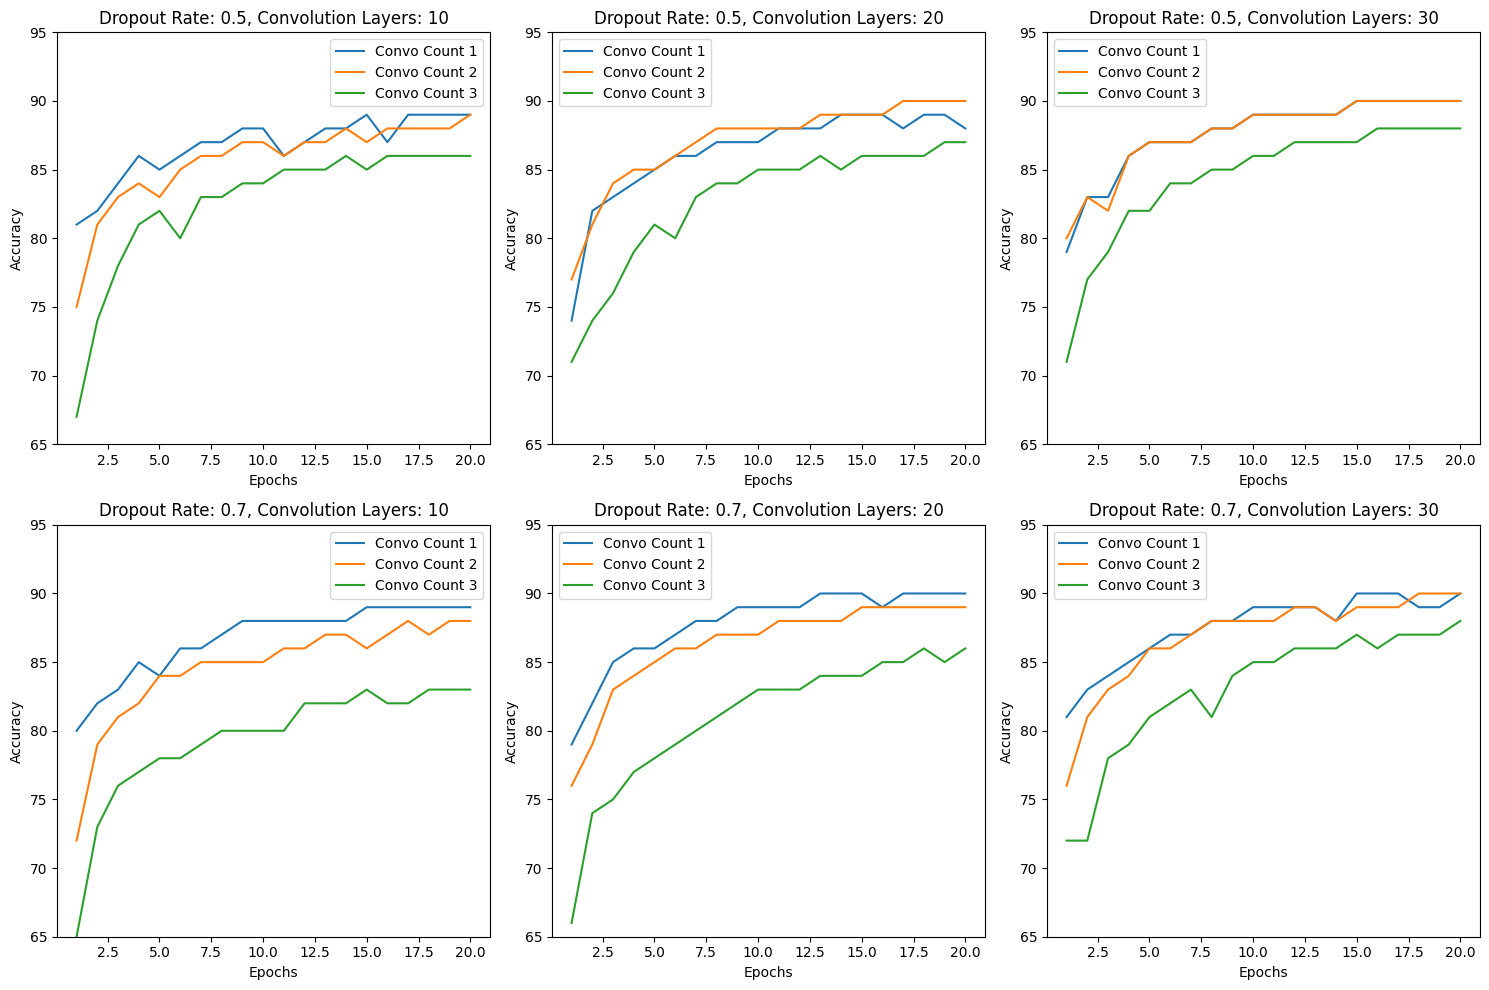

In [15]:
dropout_rates = data['dropoutRate'].unique()
channel_counts = data['channelSize'].unique()

fig, axs = plt.subplots(len(dropout_rates), len(channel_counts), figsize=(15, 10))

for i, dropout_rate in enumerate(dropout_rates):
    for j, channel_count in enumerate(channel_counts):
        filtered_data = data[(data['dropoutRate'] == dropout_rate) & (data['channelSize'] == channel_count)]
        
        for convo_size, convo_data in filtered_data.groupby('convoCount'):
            axs[i, j].plot(convo_data['epochs'], convo_data['accuracy'], label=f'Convo Count {convo_size}')
        
        axs[i, j].set_title(f'Dropout Rate: {dropout_rate}, Convolution Layers: {channel_count}')
        axs[i, j].set_xlabel('Epochs')
        axs[i, j].set_ylabel('Accuracy')
        axs[i, j].set_ylim(65, 95)
        axs[i, j].legend()

plt.tight_layout()
plt.show()